# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Import pandas library
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

# Downloaded WeRateDogs Twitter data from 
# https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv
# and uploaded to Project workspace

# Importing the twitter_archive_enhanced CSV file into a DataFrame
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')

# Check to see if the file was uploaded correctly
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# importing the requests library
import requests

# creating HTTP response object
# sending a HTTP request to the server and saving the HTTP response in a response object called r
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

r.status_code
r.headers['content-type']

# Saving received content as a tsv file in binary format
with open("image_predictions.tsv",'wb') as f:
    f.write(r.content) # writing the contents of the response (r.content) to a new file in binary mode.

In [4]:
# Import the tweet image prediction TSV file into a DataFrame
image_pred = pd.read_csv('image_predictions.tsv', '\t')

In [5]:
# Check to see if the file was imported correctly
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
# I dont have twitter developers account, so I am using the shortcut method 
# provided to gather the tweet-json.txt data
# The tweet-json.txt data could not be downloaded but links to http page 
# when clicked on it,  so I am using the import request library to gather the data from the http page

# sending a HTTP request to the server and saving the HTTP response in a response object called d
import requests
d = requests.get('https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt')
d.status_code

# Saving received content as a tsv file in binary format
with open("tweet_json.txt",'wb') as f:
    f.write(d.content) # writing the contents of the response (d.content) to a new file in binary mode.

In [7]:
#importing json library
import json
#creating an empty list
list = []
#reading the tweet id, rtweet count and favorite count line by line into the list
with open("tweet_json.txt",'r') as file:
    for line in file.readlines():
        tweet_json_file = json.loads(line)
        tweet_id = tweet_json_file["id"]
        favorite_count = tweet_json_file["favorite_count"]
        retweet_count = tweet_json_file["retweet_count"]
        blank_dict = {'id':tweet_id,'favorite_count':favorite_count, 'retweet_count':retweet_count}
        list.append(blank_dict)
#converting the list into DataFrame
tweet = pd.DataFrame(list, columns = ['id', 'favorite_count', 'retweet_count'])
#renaming the id column to tweet_id
tweet.rename(columns = {'id':'tweet_id'}, inplace = True)

In [8]:
#Check to the file
tweet.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [9]:
#head() function is used to view the first 5 rows of the twitter_archive so as to examine the data
twitter_archive.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None


In [10]:
#tail() function is used to view the last 5 rows of the twitter_archive dataframe so as to examine the data
twitter_archive.tail(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [11]:
#head() function is used to view the first 5 rows so as to examine the data
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
#tail() function is used to view the last 5 rows of the image_predictions dataframe so as to examine the data
image_pred.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [13]:
#head() function is used to view the first 5 rows of the tweet dataframe so as to examine the data
tweet.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [14]:
#tail() function is used to view the last 5 rows of tweet dataframe so as to examine the data
tweet.tail()

,tweet_id,favorite_count,retweet_count
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48
2353,666020888022790149,2535,532


In [15]:
#Checking for columns with null values and the datatype
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
#Checking for columns with null values and the datatype
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
#checking for the statistical information of the dataframe
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
#checking for the statistical information of the dataframe
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [19]:
#checking for the statistical information of the dataframe
tweet.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [20]:
#taking a random data sample from twitter archive dataset
twitter_archive.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
309,835536468978302976,NaN,NaN,2017-02-25 17:06:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Lola. Her hobbies include ...,8.352641e+17,4.196984e+09,2017-02-24 23:04:14 +0000,https://www.gofundme.com/lolas-life-saving-sur...,12,10,Lola,None,None,None,None
327,833732339549220864,NaN,NaN,2017-02-20 17:37:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rolltidered: This is Gabby. Now requests t...,8.324344e+17,4.466750e+07,2017-02-17 03:39:51 +0000,https://twitter.com/rolltidered/status/8324343...,12,10,Gabby,None,None,None,None
509,812466873996607488,NaN,NaN,2016-12-24 01:16:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mary. She's desperately trying to recr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/812466873...,12,10,Mary,None,None,None,None


In [21]:
#taking a random data sample from image predictions dataset
image_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1771,827653905312006145,https://pbs.twimg.com/media/C3xq1ZeWEAEuzw3.jpg,1,collie,0.285555,True,Border_collie,0.217306,True,Saint_Bernard,0.143245,True
1133,728409960103686147,https://pbs.twimg.com/media/ChvU_DwWMAArx5L.jpg,1,Siamese_cat,0.478278,False,Saint_Bernard,0.094246,True,king_penguin,0.082157,False
35,666437273139982337,https://pbs.twimg.com/media/CT-pKmRWIAAxUWj.jpg,1,Chihuahua,0.671853,True,beagle,0.124680,True,Saluki,0.044094,True
115,667937095915278337,https://pbs.twimg.com/media/CUT9PuQWwAABQv7.jpg,1,hamster,0.172078,False,guinea_pig,0.094924,False,Band_Aid,0.059995,False
1431,773247561583001600,https://pbs.twimg.com/media/Crsgi9dWEAApQd8.jpg,1,seat_belt,0.713588,False,miniature_pinscher,0.083369,True,Brabancon_griffon,0.075696,True


In [22]:
#taking a random data sample from tweet dataset
tweet.sample(3)

,tweet_id,favorite_count,retweet_count
1562,688116655151435777,3093,888
538,806576416489959424,5370,2230
1626,684588130326986752,4489,1592


In [23]:
#checking for missing values
tweet.isnull().sum()

tweet_id          0
favorite_count    0
retweet_count     0
dtype: int64

In [26]:
#calculating the total number of null values in each of the twitter_archive dataframe
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [27]:
#calculating the total number of null values in each of the image prediction dataframe
image_pred.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [28]:
#Checking for duplicate values in twitter archive dataset
twitter_archive[twitter_archive.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


No duplicate value in Twitter Archive dataset

In [29]:
#Checking for duplicate values in image predictions dataset
image_pred[image_pred.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [30]:
#Checking for duplicate values in tweet dataset
tweet[tweet.duplicated()]

,tweet_id,favorite_count,retweet_count


No duplicate value in image predictions dataset

In [31]:
#Checking the saze of the Dataframes
print(twitter_archive.shape)
print(image_pred.shape)
print(tweet.shape)

(2356, 17)
(2075, 12)
(2354, 3)


### Quality issues
1..Missing Data (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

2.p1/p2/p3 columns has incorrect formating (some starts with capital letter while other starts with smaller)

3 Using original twitter_archive Data and not retweeted data

4.Inconsistent decimal places or precision values

5.Ratings datatype should be float not integer (rating_numerator and rating_denominator)

6.Dividing the rating_numerator by rating_denominator to form the rating column

7.Inaccurate name column (a, an, all, the, this, by, not, such)

8.Erroneous Datatype (timestamp)

9.Changing the tweet_id datatype from integer to object since it won't be use for calculations

### Tidiness issues
1.splitted Dog stage into four columns instead one column (doggo, floofer, pupper, puppo)

2.Merge the twitter_archive Dataframe,tweet Dataframe and image_pred Dataframe

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [80]:
# Make copies of original pieces of data
twitter_clean = twitter_archive.copy()
image_clean = image_pred.copy()
tweet_clean = tweet.copy()

### Cleaning For Tidiness

### Issue #1: splitted Dog stage into four columns instead one column (doggo, floofer, pupper, puppo)

#### Define: combine doggo, floofer, pupper and puppo clumns into one column called dog_stage

#### Code

In [81]:
# Replacing none value with space
twitter_clean.doggo.replace('None', '', inplace=True)
twitter_clean.floofer.replace('None', '', inplace=True)
twitter_clean.pupper.replace('None', '', inplace=True)
twitter_clean.puppo.replace('None', '', inplace=True)

# merge into column
twitter_clean['dog_stage'] = twitter_clean.doggo + twitter_clean.floofer + twitter_clean.pupper + twitter_clean.puppo

# handle multiple stages
twitter_clean.loc[twitter_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_clean.loc[twitter_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_clean.loc[twitter_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
twitter_clean.loc[twitter_clean.dog_stage == '', 'dog_stage'] = np.nan

#Dropping the doggo, floofer, puppo, and pupper column
twitter_clean.drop(['doggo', 'floofer', 'pupper','puppo'], axis=1, inplace = True)

#Printing the dog stage column before dropping the null values
print(twitter_clean.dog_stage.unique())
#Dropping null values in dog_stage column
twitter_clean.dropna(subset=['dog_stage'], inplace=True)

#Printing the dog stage column after dropping the null values
print(twitter_clean.dog_stage.unique())

#splitting the multiple stages
twitter_clean['dog_stage'] = twitter_clean['dog_stage'].apply(lambda x: x.split(",")[0])

#Printing the dog stage column after splittng the multiple values
print(twitter_clean.dog_stage.unique())

[nan 'doggo' 'puppo' 'pupper' 'floofer' 'doggo, puppo' 'doggo, floofer'
 'doggo, pupper']
['doggo' 'puppo' 'pupper' 'floofer' 'doggo, puppo' 'doggo, floofer'
 'doggo, pupper']
['doggo' 'puppo' 'pupper' 'floofer']


#### Test

In [82]:
#checking the result of the combination
print(twitter_clean.shape)
print(twitter_clean.dog_stage.unique())
twitter_clean.head(3)

(380, 14)
['doggo' 'puppo' 'pupper' 'floofer']


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,puppo
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,puppo


### Issue #2: Merge the twitter_archive Dataframe,tweet Dataframe and image_pred Dataframe

#### Define: merging the image_pred, tweet Dataframe and  the twitter_archive dataframe on tweet_id

#### Code

In [83]:
#using the below code to merge the image_pred to twitter_archive
twitter = twitter_clean.merge(tweet_clean, on=['tweet_id']).merge(image_clean, on=['tweet_id'])

#### Test

In [84]:
#checking the output of the merged dataframes
print(twitter.shape)
twitter.head(3)

(320, 27)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
1,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,...,1,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True
2,889531135344209921,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,...,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True


### Cleaning For Quality

### Issue #3: Using original twitter_archive Data and not retweeted data

#### Define: Dropping all retweeted Data to avoid duplicates

#### Code:

In [85]:
#Checking for retweeted data
print(twitter.retweeted_status_id.notnull().sum())
print(twitter.retweeted_status_user_id.notnull().sum())
print(twitter.retweeted_status_timestamp.notnull().sum())

#dropping the retweeted data
twitter = twitter[twitter.retweeted_status_id.isnull()]
twitter = twitter[twitter.retweeted_status_user_id.isnull()]
twitter = twitter[twitter.retweeted_status_timestamp.isnull()]

14
14
14


#### Test:

In [86]:
#Checking for the retweeted data
print(twitter.retweeted_status_id.notnull().sum())
twitter.shape

0


(306, 27)

### Issue #4: Missing Data (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls)

#### Define: Drop the columns in twitter_clean dataframe with missing values as the are no going to be useful

#### Code

In [87]:
#Dropping the some columns that will not be useful for this analysis
twitter.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
              'retweeted_status_user_id', 'retweeted_status_timestamp', 
              'expanded_urls'], axis=1, inplace = True)

In [88]:
twitter.dropna(subset=['dog_stage'], inplace=True)
twitter.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
dog_stage             0
favorite_count        0
retweet_count         0
jpg_url               0
img_num               0
p1                    0
p1_conf               0
p1_dog                0
p2                    0
p2_conf               0
p2_dog                0
p3                    0
p3_conf               0
p3_dog                0
dtype: int64

#### Test

In [89]:
#confirming the removal of those columns
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 0 to 319
Data columns (total 21 columns):
tweet_id              306 non-null int64
timestamp             306 non-null object
source                306 non-null object
text                  306 non-null object
rating_numerator      306 non-null int64
rating_denominator    306 non-null int64
name                  306 non-null object
dog_stage             306 non-null object
favorite_count        306 non-null int64
retweet_count         306 non-null int64
jpg_url               306 non-null object
img_num               306 non-null int64
p1                    306 non-null object
p1_conf               306 non-null float64
p1_dog                306 non-null bool
p2                    306 non-null object
p2_conf               306 non-null float64
p2_dog                306 non-null bool
p3                    306 non-null object
p3_conf               306 non-null float64
p3_dog                306 non-null bool
dtypes: bool(3), float

### Issue #5: p1/p2/p3 columns has incorrect formating (some starts with capital letter while other starts with smaller

#### Define: Converting the p1/p2/p3 to Title case

#### Code:

In [90]:
#converting the first letters of the words to upper case
twitter['p1']=twitter['p1'].str.title()
twitter['p2']=twitter['p2'].str.title()
twitter['p3']=twitter['p3'].str.title()

#### Test:

In [91]:
#Title case worked
print(twitter['p1'].head())
print(twitter['p2'].head())
print(twitter['p3'].head())

0            Pembroke
1            Pembroke
2    Golden_Retriever
3      French_Bulldog
4     German_Shepherd
Name: p1, dtype: object
0              Cardigan
1              Cardigan
2    Labrador_Retriever
3             Chihuahua
4              Malinois
Name: p2, dtype: object
0             Chihuahua
1               Basenji
2               Redbone
3           Boston_Bull
4    Norwegian_Elkhound
Name: p3, dtype: object


### Issue #6: Inconsistent decimal places or precision values

#### Define:Converting the values to 8 decimal places for consistency

#### Code:

In [92]:
#Rounding off the values to 8 decimal places
twitter.p1_conf.round(8)
twitter.p2_conf.round(8)
twitter.p3_conf.round(8)

0      0.029248
1      0.004633
2      0.007958
3      0.000076
4      0.049148
5      0.002140
6      0.015579
7      0.114854
8      0.039725
10     0.088935
11     0.157402
12     0.049182
13     0.012676
14     0.092861
15     0.003383
16     0.003228
17     0.006296
18     0.001670
19     0.001771
20     0.019285
21     0.026917
22     0.096100
23     0.021762
24     0.131706
26     0.052335
27     0.052955
28     0.181985
29     0.101518
31     0.030387
32     0.011657
         ...   
290    0.043312
291    0.042848
292    0.227677
293    0.008120
294    0.002605
295    0.074819
296    0.014680
297    0.114498
298    0.148236
299    0.045878
300    0.052175
301    0.008847
302    0.058934
303    0.057559
304    0.085626
305    0.111177
306    0.000652
307    0.012613
308    0.025456
309    0.038160
310    0.036570
311    0.058034
312    0.033079
313    0.008786
314    0.002015
315    0.027037
316    0.094465
317    0.001618
318    0.003267
319    0.065456
Name: p3_conf, Length: 3

#### Test:

In [93]:
print(twitter.p1_conf.head())
print(twitter.p2_conf.head())
print(twitter.p3_conf.head())

0    0.511319
1    0.966327
2    0.953442
3    0.999201
4    0.707046
Name: p1_conf, dtype: float64
0    0.451038
1    0.027356
2    0.013834
3    0.000361
4    0.199396
Name: p2_conf, dtype: float64
0    0.029248
1    0.004633
2    0.007958
3    0.000076
4    0.049148
Name: p3_conf, dtype: float64


### Issue #7: Ratings datatype should be float not integer (rating_numerator and rating_denominator)

#### Define: Converting the rating_numerator and rating_denominator to float datatype

#### Code:

In [94]:
#converting the rating_numerator value back to float
twitter.rating_numerator = twitter.rating_numerator.astype(float)

#converting the rating_numerator value back to float
twitter.rating_denominator = twitter.rating_denominator.astype(float)

#### Test:

In [95]:
#Checking for correctness
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 0 to 319
Data columns (total 21 columns):
tweet_id              306 non-null int64
timestamp             306 non-null object
source                306 non-null object
text                  306 non-null object
rating_numerator      306 non-null float64
rating_denominator    306 non-null float64
name                  306 non-null object
dog_stage             306 non-null object
favorite_count        306 non-null int64
retweet_count         306 non-null int64
jpg_url               306 non-null object
img_num               306 non-null int64
p1                    306 non-null object
p1_conf               306 non-null float64
p1_dog                306 non-null bool
p2                    306 non-null object
p2_conf               306 non-null float64
p2_dog                306 non-null bool
p3                    306 non-null object
p3_conf               306 non-null float64
p3_dog                306 non-null bool
dtypes: bool(3), f

### Issue #8: Dividing the rating_numerator by rating_denominator to form the rating column

#### Define: Dividing the rating_numerator by the rating_denominator and assigning the value to a new column rating. Then dropping the rating_numerator and rating_denominator

#### Code: 

In [96]:
#Dividing the rating_numerator by the rating_denominator 
twitter['rating'] = twitter.rating_numerator / twitter.rating_denominator
#Dropping the rating_numerator and the rating_denominator
twitter.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace = True)

#### Test:

In [97]:
#checking the unique values of the rating column and the datatype
print(twitter.rating.unique())
twitter.info()

[ 1.4  1.3  1.2  1.1  1.   2.7  0.8  0.5  0.9  0.3  0.7  0.6]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 0 to 319
Data columns (total 20 columns):
tweet_id          306 non-null int64
timestamp         306 non-null object
source            306 non-null object
text              306 non-null object
name              306 non-null object
dog_stage         306 non-null object
favorite_count    306 non-null int64
retweet_count     306 non-null int64
jpg_url           306 non-null object
img_num           306 non-null int64
p1                306 non-null object
p1_conf           306 non-null float64
p1_dog            306 non-null bool
p2                306 non-null object
p2_conf           306 non-null float64
p2_dog            306 non-null bool
p3                306 non-null object
p3_conf           306 non-null float64
p3_dog            306 non-null bool
rating            306 non-null float64
dtypes: bool(3), float64(4), int64(4), object(9)
memory usage: 43.9+ KB


### Issue #9:  Inaccurate name column (a, an, all, the, this, by, not, such)

#### Define: Dropping words that are not Dog names which are in small letters

#### Code:

In [98]:
#converting the names in small letter to null value
twitter.name = [np.nan if row['name'].islower() else row['name'] for lab, row in twitter.iterrows()]

#Dropping null values in name column
twitter.dropna(subset=['name'], inplace=True)

#### Test:

In [99]:
print(twitter.name.isnull().sum())
twitter.name.unique()

0


array(['Cassie', 'None', 'Stuart', 'Roscoe', 'Yogi', 'Grizzwald', 'Gus',
       'Snoopy', 'Ginger', 'Jed', 'Sebastian', 'Sierra', 'Rover',
       'Napolean', 'Scout', 'Shikha', 'Jamesy', 'Boomer', 'Barney',
       'Mimosa', 'Pickles', 'Clark', 'Meera', 'Ava', 'Gidget', 'Rhino',
       'Smiley', 'Miguel', 'Emanuel', 'Pete', 'Astrid', 'Doobert', 'Kona',
       'Loki', 'Cupid', 'Pilot', 'Pablo', 'Gabe', 'Duchess', 'Sundance',
       'Oliver', 'Sunny', 'Bo', 'Dido', 'Cooper', 'Chubbs', 'Rocky',
       'Craig', 'Ollie', 'Diogi', 'Bones', 'Doc', 'Sobe', 'Laika', 'Lily',
       'Betty', 'Tonks', 'Rizzo', 'Pinot', 'Deacon', 'Sampson', 'Sophie',
       'Huck', 'Anakin', 'Finley', 'Winnie', 'Chelsea', 'Willem', 'Gerald',
       'Louie', 'Wishes', 'Maggie', 'Jax', 'Milo', 'Malcolm', 'Zoe',
       'Piper', 'Finn', 'Blu', 'Divine', 'Lenox', 'Abby', 'Kilo', 'Edmund',
       'Aqua', 'Baloo', 'Benji', 'Bayley', 'Rory', 'Kellogg', 'Buckley',
       'Moose', 'Kyle', 'Rooney', 'Rueben', 'Lillie', 'Ashlei

### Issue #10:Erroneous Datatype (timestamp)

#### Define: Converting assigned timestamp column from object datatype to datetime datatype.

#### Code:

In [100]:
# To datetime
twitter.timestamp = pd.to_datetime(twitter.timestamp)

#### Test:

In [101]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 0 to 319
Data columns (total 20 columns):
tweet_id          294 non-null int64
timestamp         294 non-null datetime64[ns]
source            294 non-null object
text              294 non-null object
name              294 non-null object
dog_stage         294 non-null object
favorite_count    294 non-null int64
retweet_count     294 non-null int64
jpg_url           294 non-null object
img_num           294 non-null int64
p1                294 non-null object
p1_conf           294 non-null float64
p1_dog            294 non-null bool
p2                294 non-null object
p2_conf           294 non-null float64
p2_dog            294 non-null bool
p3                294 non-null object
p3_conf           294 non-null float64
p3_dog            294 non-null bool
rating            294 non-null float64
dtypes: bool(3), datetime64[ns](1), float64(4), int64(4), object(8)
memory usage: 42.2+ KB


### Issue #11: Changing the tweet_id datatype from integer to object since it won't be use for calculations

#### Define:Changing the tweet_id datatype from integer to object 

#### Code:

In [102]:
#converting tweet_id to object
twitter.tweet_id = twitter.tweet_id.astype(str)

#### Test:

In [103]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 0 to 319
Data columns (total 20 columns):
tweet_id          294 non-null object
timestamp         294 non-null datetime64[ns]
source            294 non-null object
text              294 non-null object
name              294 non-null object
dog_stage         294 non-null object
favorite_count    294 non-null int64
retweet_count     294 non-null int64
jpg_url           294 non-null object
img_num           294 non-null int64
p1                294 non-null object
p1_conf           294 non-null float64
p1_dog            294 non-null bool
p2                294 non-null object
p2_conf           294 non-null float64
p2_dog            294 non-null bool
p3                294 non-null object
p3_conf           294 non-null float64
p3_dog            294 non-null bool
rating            294 non-null float64
dtypes: bool(3), datetime64[ns](1), float64(4), int64(3), object(9)
memory usage: 42.2+ KB


In [104]:
twitter[twitter.jpg_url.duplicated()]

,tweet_id,timestamp,source,text,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [105]:
# Saving twitter dataset to twitter_archive_master
twitter.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [107]:
twitter_arch_master = pd.read_csv('twitter_archive_master.csv')
twitter_arch_master.head()

,tweet_id,timestamp,source,text,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
0,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,Cassie,doggo,32467,7711,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,1.4
1,889665388333682689,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,None,puppo,38818,8538,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,0.966327,True,Cardigan,0.027356,True,Basenji,0.004633,True,1.3
2,889531135344209921,2017-07-24 17:02:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,Stuart,puppo,15359,2321,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,Golden_Retriever,0.953442,True,Labrador_Retriever,0.013834,True,Redbone,0.007958,True,1.3
3,886366144734445568,2017-07-15 23:25:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,Roscoe,pupper,21524,3316,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,1,French_Bulldog,0.999201,True,Chihuahua,0.000361,True,Boston_Bull,0.000076,True,1.2
4,884162670584377345,2017-07-09 21:29:42,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,Yogi,doggo,20771,3128,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1,German_Shepherd,0.707046,True,Malinois,0.199396,True,Norwegian_Elkhound,0.049148,True,1.2


In [108]:
twitter_arch_master.describe()

,tweet_id,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf,rating
count,2.940000e+02,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,7.457375e+17,11279.799320,3840.136054,1.275510,0.617873,0.134477,0.055138,1.108503
std,6.513294e+16,16655.096636,7570.957853,0.657547,0.268009,0.107375,0.049101,0.198533
min,6.721600e+17,693.000000,103.000000,1.000000,0.059033,0.000010,0.000001,0.300000
25%,6.855714e+17,2714.500000,887.250000,1.000000,0.401938,0.044671,0.014701,1.000000
50%,7.327424e+17,5635.500000,1759.500000,1.000000,0.654729,0.109431,0.039766,1.100000
75%,8.019583e+17,12594.750000,3671.500000,1.000000,0.846896,0.194125,0.082922,1.200000
max,8.902403e+17,132810.000000,79515.000000,4.000000,0.999984,0.467678,0.227677,2.700000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1789a949b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f178981b780>]], dtype=object)

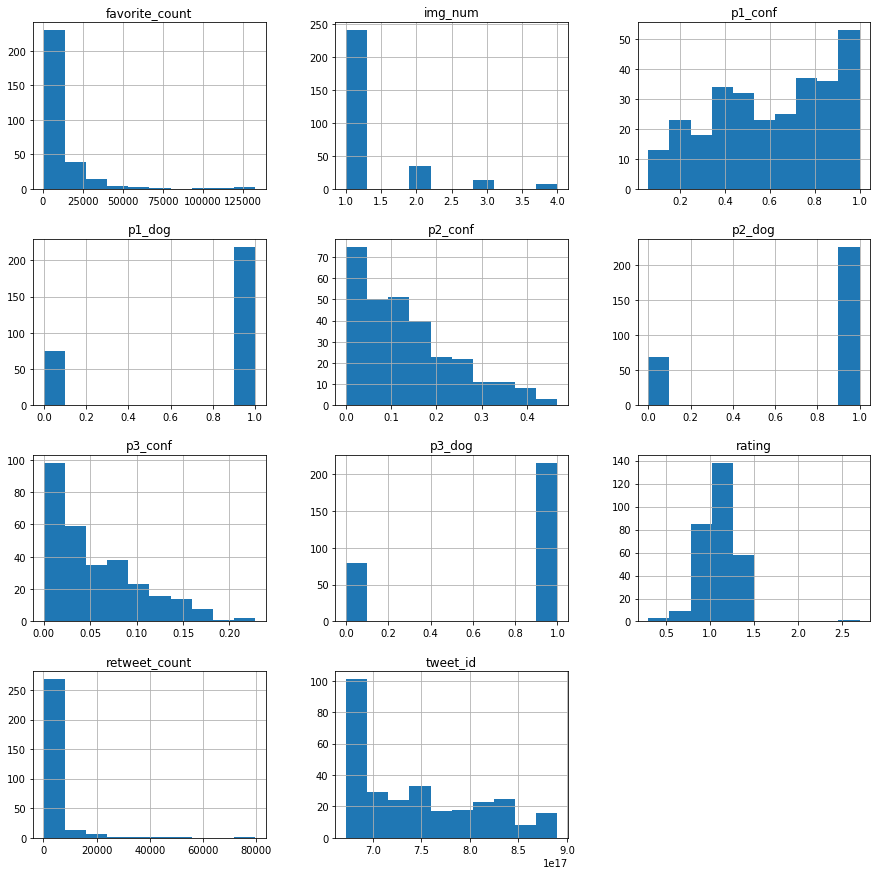

In [109]:
twitter_arch_master.hist(figsize = (15,15))

### Insights:
1.What number of Dogs are classified under the various dog stages

2.What is the best rating in each of the Dog stage

3.The most fovorite Dog stage

4.The correlation between the #1 tweet image prediction and the second #2 tweet image prediction.

### Visualization

pupper     194
doggo       71
puppo       22
floofer      7
Name: dog_stage, dtype: int64


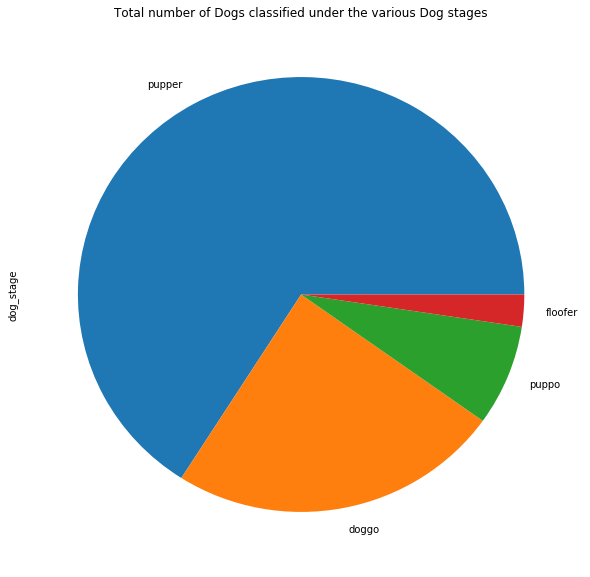

In [110]:
# The number of Dogs classified under the various Dog stage
print(twitter_arch_master.dog_stage.value_counts())

twitter_arch_master.dog_stage.value_counts().plot(kind='pie', title='Total number of Dogs classified under the various Dog stages', figsize=(10,10))

In [111]:
#The highest ratings in each dog stage
highest_rating = twitter_arch_master.groupby(['dog_stage']).rating.max()
highest_rating


dog_stage
doggo      1.4
floofer    1.3
pupper     2.7
puppo      1.4
Name: rating, dtype: float64

Text(0,0.5,'Rating')

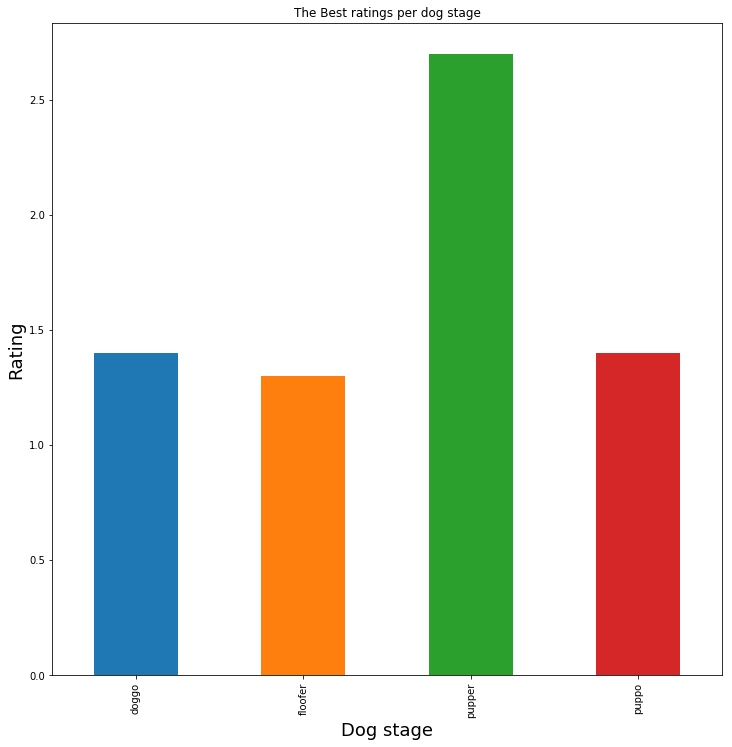

In [112]:
#The Best ratings per dog stage
highest_rating.plot(kind='bar',figsize=(12,12), title='The Best ratings per dog stage');
plt.xlabel('Dog stage', fontsize=18)
plt.ylabel('Rating', fontsize=18)

In [114]:
#The most fovorite Dog stage
most_favorite= twitter_arch_master.groupby(['dog_stage']).favorite_count.max()
most_favorite


dog_stage
doggo      131075
floofer     33345
pupper     106827
puppo      132810
Name: favorite_count, dtype: int64

Text(0,0.5,'Favourite')

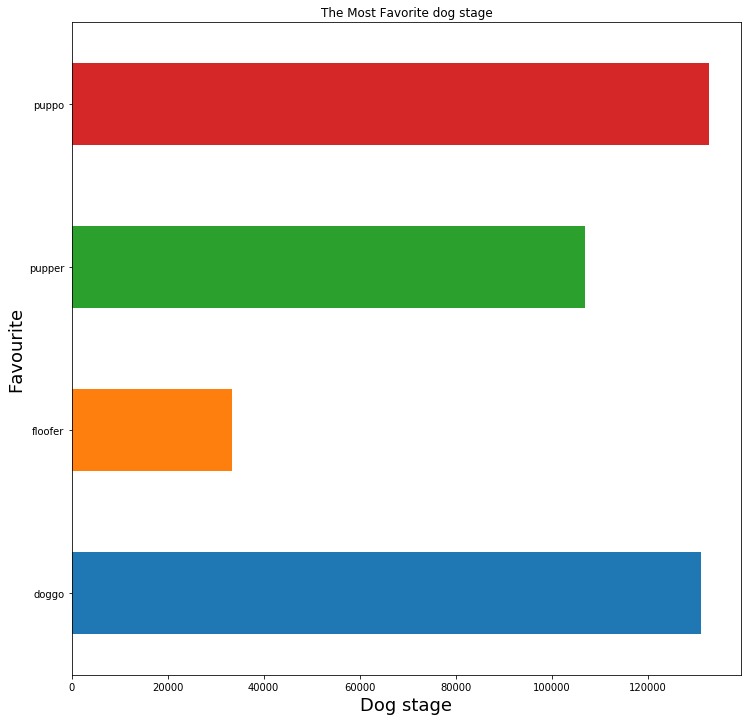

In [115]:
#The most fovorite Dog stage
most_favorite.plot(kind='barh',figsize=(12,12), title='The Most Favorite dog stage');
plt.xlabel('Dog stage', fontsize=18)
plt.ylabel('Favourite', fontsize=18)

[Text(0,0.5,'p1_conf'),
 Text(0.5,0,'p2_conf'),
 Text(0.5,1,'Dog Breed image Predictions')]

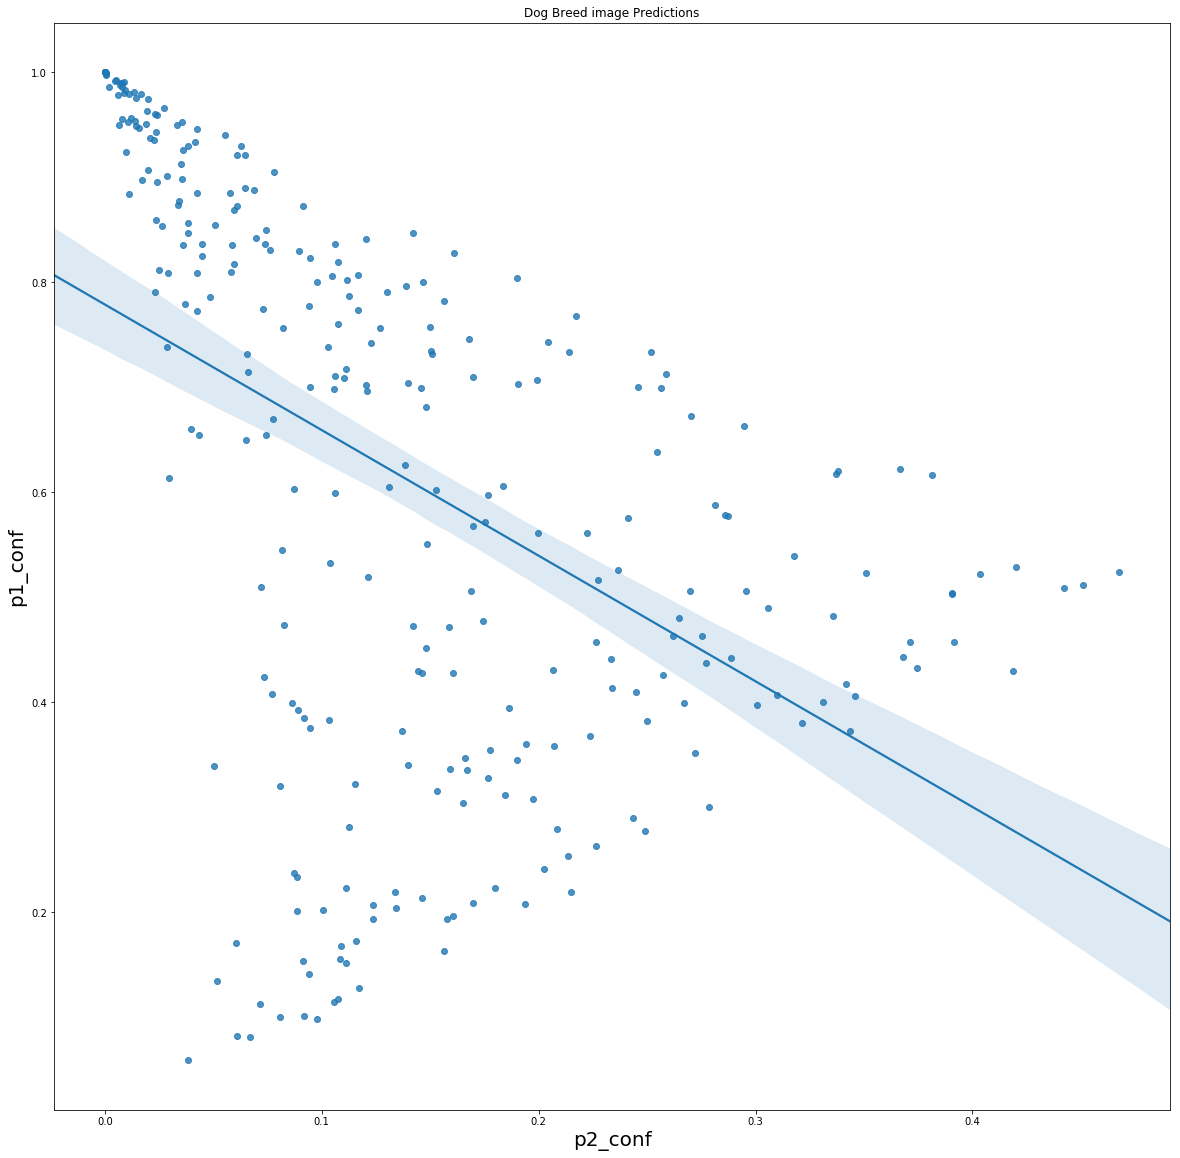

In [116]:
#plot p1_conf vs p2_conf
plt.figure(figsize=[20,20])
plt.xlabel('p2_conf', fontsize=20)
plt.ylabel('p1_conf',fontsize=20)
plt.title('Dog Breed image Predictions', fontsize=25)
sns.regplot(data=twitter_arch_master, x='p2_conf', y='p1_conf').set(xlabel='p2_conf', ylabel='p1_conf', title='Dog Breed image Predictions')